# Polynomial

The take home message of this notebook is that we can similarly train a model to learn the parameters of a dataset following a sixth degree polynomial distribution. It has a LOT hard of a time finding the correct weights, especially depending on what portion of the distribution we give it to train on, but it can still get pretty close. 

using version 1.12.1
Shape of X is torch.Size([800])
Shape of X is torch.Size([800, 1])
Shape of y is torch.Size([800, 1])
Shape of noise is torch.Size([800, 1])


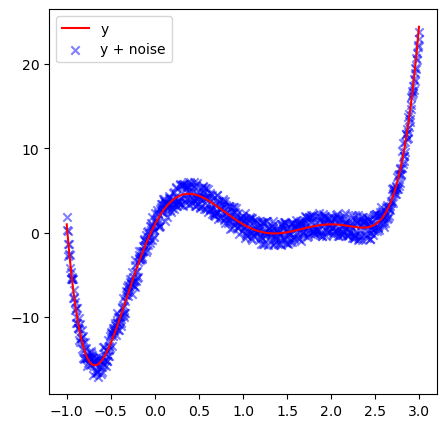

In [ ]:
import torch
import numpy as np
from torch import nn
import matplotlib.pyplot as plt

print(f'using version {torch.__version__}')

# generate some data
def poly(x): return 2*x**6 -13*x**5 + 26*x**4 - 7*x**3 -28 *x**2 + 20*x + 1

X = torch.arange(-1,3,0.005)
print(f'Shape of X is {X.shape}')
X = X.unsqueeze(dim=1)
print(f'Shape of X is {X.shape}')
y = poly(X)
print(f'Shape of y is {y.shape}')
noise = torch.rand(size = X.size()) - 0.5 # noise is between -0.5 and 0.5
print(f'Shape of noise is {noise.shape}')
y_noise = y + noise * 3

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(X.numpy(), y.numpy(), label='y', c='r')
ax.scatter(X.numpy(), y_noise.numpy(), marker='x', alpha=0.5, label='y + noise', c='b')
ax.legend(loc='upper left')
plt.show()

## Nonlinear Regression Model

The universal approximation theorum states that a neural network with two linear layers, one of which is made nonlinear with an activation function, can approximate any arbitrary distribution: https://www.youtube.com/watch?v=Ijqkc7OLenI&ab_channel=MichaelNielsen

In [1]:
import torch
print (torch.__version__)

_ = torch.manual_seed (2022)


from torch import nn

print(f'using version {torch.__version__}')

# create some known parameters
p1 = 2
p2 = -13
p3 = 26
p4 = -7
p5 = -28
p6 = 20
p7 = 1

# generate some data
def poly(x): 
    return p1*x**6 + p2*x**5 + p3*x**4 + p4*x**3 + p5*x**2 + p6*x + p7
size = 100
start = -1
end = 3
X = torch.arange(start, end, (end-start)/size)
y = poly(X) # + torch.normal(0, 0.75, size=(size,)) # if you want to add noise

# Train test split
X_train = torch.cat((X[:40], X[50:]))
y_train = torch.cat((y[:40], y[50:]))
X_test = X[40:50]
y_test = y[40:50]

# Build the model:
class PolynomialRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.p1 = nn.Parameter(torch.rand( 1,
                                                requires_grad=True,
                                                dtype=torch.float32))
        self.p2 = nn.Parameter(torch.rand( 1,
                                                requires_grad=True,
                                                dtype=torch.float32))
        self.p3 = nn.Parameter(torch.rand( 1,
                                                requires_grad=True,
                                                dtype=torch.float32))
        self.p4 = nn.Parameter(torch.rand( 1,
                                                requires_grad=True,
                                                dtype=torch.float32))
        self.p5 = nn.Parameter(torch.rand( 1,
                                                requires_grad=True, 
                                                dtype=torch.float32))
        self.p6 = nn.Parameter(torch.rand( 1,
                                                requires_grad=True,
                                                dtype=torch.float32))
        self.p7 = nn.Parameter(torch.rand( 1,
                                                requires_grad=True,
                                                dtype=torch.float32))
    def forward(self, x):
        # replace self.p7*x with self.p6*x
        return self.p1*x**6 + self.p2*x**5 + self.p3*x**4 + self.p4*x**3 + self.p5*x**2 + self.p6*x + self.p7

# Create the model
torch.manual_seed(42)
model = PolynomialRegressionModel()

# Define the loss function and the optimizer
loss_fn = nn.L1Loss()
# learning_rate = 0.0001
learning_rate = 0.00001   # reduce the learning rate for stability
# add momentum to SGD to speed up training dramatically
optimizer = torch.optim.SGD(params = model.parameters(), 
                            lr = learning_rate, momentum = 0.99)

# Train the model
# epochs = 10000
epochs = 1000001   # one hundred times as many epochs
epoch_num = []
train_losses = []
test_losses = []
for epoch in range(epochs):
    model.train()
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
        test_pred = model(X_test)
        test_loss = loss_fn(test_pred, y_test)

        # if epoch % 10 == 0:
        if epoch % 100000 == 0:  # print less frequently
            epoch_num.append(epoch)
            train_losses.append(loss.item())
            test_losses.append(test_loss.item())
            print(f'Epoch: {epoch} | MAE train loss: {round(loss.item(), 6)} | MAE test loss: {round(test_loss.item(), 6)}')

# compare fit polynomial coefficients to originals
print ('p1:', p1, model.p1.item())
print ('p2:', p2, model.p2.item())
print ('p3:', p3, model.p3.item())
print ('p4:', p4, model.p4.item())
print ('p5:', p5, model.p5.item())
print ('p6:', p6, model.p6.item())
print ('p7:', p7, model.p7.item())

1.12.1
using version 1.12.1
Epoch: 0 | MAE train loss: 116.280228 | MAE test loss: 1.51387
Epoch: 100000 | MAE train loss: 2.41297 | MAE test loss: 2.23823
Epoch: 200000 | MAE train loss: 2.027973 | MAE test loss: 1.839191
Epoch: 300000 | MAE train loss: 1.654769 | MAE test loss: 1.465744
Epoch: 400000 | MAE train loss: 1.284274 | MAE test loss: 1.136842
Epoch: 500000 | MAE train loss: 0.918787 | MAE test loss: 0.820901
Epoch: 600000 | MAE train loss: 0.552438 | MAE test loss: 0.497894
Epoch: 700000 | MAE train loss: 0.218316 | MAE test loss: 0.135481
Epoch: 800000 | MAE train loss: 0.067297 | MAE test loss: 0.000495
Epoch: 900000 | MAE train loss: 0.094873 | MAE test loss: 0.0005
Epoch: 1000000 | MAE train loss: 0.096503 | MAE test loss: 0.000471
p1: 2 1.9982753992080688
p2: -13 -13.000005722045898
p3: 26 26.000587463378906
p4: -7 -7.000130653381348
p5: -28 -28.000160217285156
p6: 20 19.999980926513672
p7: 1 0.9999847412109375


Epoch 0 | Loss is 44.083988189697266
Epoch 100 | Loss is 43.29347229003906
Epoch 200 | Loss is 36.15739822387695
Epoch 300 | Loss is 28.528303146362305
Epoch 400 | Loss is 14.3385009765625
Epoch 500 | Loss is 13.879655838012695
Epoch 600 | Loss is 13.442055702209473
Epoch 700 | Loss is 12.901278495788574
Epoch 800 | Loss is 12.08529281616211
Epoch 900 | Loss is 10.562100410461426
Epoch 1000 | Loss is 8.64587688446045
Epoch 1100 | Loss is 10.084687232971191
Epoch 1200 | Loss is 6.915067195892334
Epoch 1300 | Loss is 6.434930324554443
Epoch 1400 | Loss is 5.63245964050293
Epoch 1500 | Loss is 5.017941474914551
Epoch 1600 | Loss is 4.537531852722168
Epoch 1700 | Loss is 4.167290687561035
Epoch 1800 | Loss is 3.864248037338257
Epoch 1900 | Loss is 3.6081061363220215
Epoch 2000 | Loss is 3.3762006759643555
Epoch 2100 | Loss is 3.142446279525757
Epoch 2200 | Loss is 3.1318421363830566
Epoch 2300 | Loss is 2.9471373558044434
Epoch 2400 | Loss is 2.7988193035125732


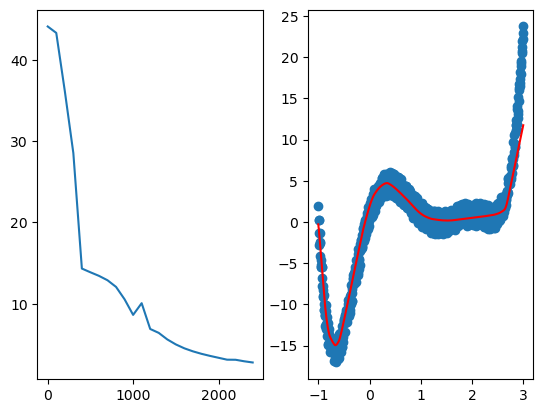

In [117]:
class NonLinReg(nn.Module):
    def __init__(self, in_dim, num_hidden_neurons, out_dim):
        super(NonLinReg, self).__init__()
        self.layers = nn.Sequential(
        nn.Linear(in_features = in_dim,
                out_features = num_hidden_neurons,
                bias = True),
        nn.ReLU(),
        nn.Linear(in_features = num_hidden_neurons,
                out_features = num_hidden_neurons,
                bias = True),
        nn.ReLU(),
        nn.Linear(in_features = num_hidden_neurons,
                out_features = num_hidden_neurons,
                bias = True),
        nn.ReLU(),
        nn.Linear(in_features = num_hidden_neurons,
                out_features = num_hidden_neurons,
                bias = True),
        nn.ReLU(),
        nn.Linear(in_features = num_hidden_neurons,
                out_features = num_hidden_neurons,
                bias = True),
        nn.ReLU(),
        nn.Linear(in_features = num_hidden_neurons,
                out_features = num_hidden_neurons,
                bias = True),
        nn.ReLU(),
        nn.Linear(in_features = num_hidden_neurons,
                out_features = out_dim,  
                bias = True))
    def forward(self, x): return self.layers(x)

model = NonLinReg(in_dim = 1,
                  num_hidden_neurons = 500,
                  out_dim = 1)

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

FIG_SAVE_PATH = 'learnpytorch_01_ExtraCred_plots'
loss_curve_x = []
loss_curve_y = []
epochs = 2500

def eval(epoch_num):
    pred = model(X)
    loss = loss_fn(pred, y_noise)
    print(f'Epoch {epoch_num} | Loss is {loss}')
    loss_curve_x.append(epoch_num)
    loss_curve_y.append(loss.detach().numpy()) # loss is a tensor that requres grad to we have to detach it

def save_progress(epoch_num):
    fig, ax = plt.subplots()
    y_pred = model(X)
    ax.scatter(X.numpy(), y_noise.numpy(), label='target', marker='x', c='b')
    ax.plot(X.numpy(), y_pred.detach().numpy(), label='prediction', c='r')
    ax.legend(loc='upper left')
    ax.set_title(f'Epoch {epoch_num}')
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    plt.savefig(f'{FIG_SAVE_PATH}/{epoch_num}.png')
    plt.close()

def train(num_epochs):
    for epoch in range(num_epochs):
        pred = model(X)
        loss = loss_fn(pred, y_noise)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 100 == 0:
            eval(epoch)
            save_progress(epoch)

train(epochs)

fig, (ax1, ax2) = plt.subplots(ncols=2)
y_pred = model(X)
ax1.plot(loss_curve_x, loss_curve_y)
ax2.scatter(X, y_noise)
ax2.plot(X, y_pred.detach(), c='r')
plt.show()


In [57]:
import torch
import numpy as np
from torch import nn
import matplotlib.pyplot as plt

print(f'using version {torch.__version__}')

# create some known parameters
p1 = 2
p2 = -13
p3 = 26
p4 = -7
p5 = -28
p6 = 20
p7 = 1

# generate some data
def poly(x): 
    return p1*x**6 + p2*x**5 + p3*x**4 + p4*x**3 + p5*x**2 + p6*x + p7
size = 100
start = -1
end = 3
X = torch.arange(start, end, (end-start)/size).unsqueeze(1)
y = poly(X) # + torch.normal(0, 0.75, size=(size,)) # if you want to add noise

# Train test split
X_train = torch.cat((X[:40], X[50:]))
X_train = torch.cat((X_train**6, X_train**5, X_train**4, X_train**3, X_train**2, X_train), dim=1)
y_train = torch.cat((y[:40], y[50:]))
y_train = torch.cat((y_train**6, y_train**5, y_train**4, y_train**3, y_train**2, y_train), dim=1)
X_test = X[40:50]
X_test = torch.cat((X_test**6, X_test**5, X_test**4, X_test**3, X_test**2, X_test), dim=1)
y_test = y[40:50]
y_test = torch.cat((y_test**6, y_test**5, y_test**4, y_test**3, y_test**2, y_test), dim=1)

# Build the model:
class PolynomialRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.p1 = nn.Parameter(torch.rand( 1,
                                                requires_grad=True,
                                                dtype=torch.float32))
        self.p2 = nn.Parameter(torch.rand( 1,
                                                requires_grad=True,
                                                dtype=torch.float32))
        self.p3 = nn.Parameter(torch.rand( 1,
                                                requires_grad=True,
                                                dtype=torch.float32))
        self.p4 = nn.Parameter(torch.rand( 1,
                                                requires_grad=True,
                                                dtype=torch.float32))
        self.p5 = nn.Parameter(torch.rand( 1,
                                                requires_grad=True, 
                                                dtype=torch.float32))
        self.p6 = nn.Parameter(torch.rand( 1,
                                                requires_grad=True,
                                                dtype=torch.float32))
        self.p7 = nn.Parameter(torch.rand( 1,
                                                requires_grad=True,
                                                dtype=torch.float32))
    def forward(self, x): 
        return self.p1*x**6 + self.p2*x**5 + self.p3*x**4 + self.p4*x**3 + self.p5*x**2 + self.p6*x + self.p7

class polyreg(nn.Module):
    def __init__(self):
        super().__init__()
        self.poly = nn.Linear(6, 1)
    def forward(self, x):
        return self.poly(x)

# Train the model


# Create the model
torch.manual_seed(42)
model = polyreg()

# Define the loss function and the optimizer
loss_fn = nn.MSELoss()
learning_rate = 0.001
optimizer = torch.optim.SGD(params = model.parameters(), 
                            lr = learning_rate)

# Train the model
epochs = 1000
epoch_num = []
train_losses = []
test_losses = []
for epoch in range(epochs):
    model.train()
    y_pred = model(X_in)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    
    with torch.inference_mode():
        test_pred = model(X_test)
        test_loss = loss_fn(test_pred, y_test)

        if epoch % 10 == 0:
            epoch_num.append(epoch)
            train_losses.append(loss.item())
            test_losses.append(test_loss.item())
            print(f'Epoch: {epoch} | MAE train loss: {round(loss.item(), 6)} | MAE test loss: {round(test_loss.item(), 6)}')


using version 1.12.1
Epoch: 0 | MAE train loss: 13020172386304.0 | MAE test loss: 25859901440.0
Epoch: 10 | MAE train loss: inf | MAE test loss: inf
Epoch: 20 | MAE train loss: nan | MAE test loss: nan
Epoch: 30 | MAE train loss: nan | MAE test loss: nan
Epoch: 40 | MAE train loss: nan | MAE test loss: nan
Epoch: 50 | MAE train loss: nan | MAE test loss: nan
Epoch: 60 | MAE train loss: nan | MAE test loss: nan
Epoch: 70 | MAE train loss: nan | MAE test loss: nan
Epoch: 80 | MAE train loss: nan | MAE test loss: nan
Epoch: 90 | MAE train loss: nan | MAE test loss: nan
Epoch: 100 | MAE train loss: nan | MAE test loss: nan
Epoch: 110 | MAE train loss: nan | MAE test loss: nan
Epoch: 120 | MAE train loss: nan | MAE test loss: nan
Epoch: 130 | MAE train loss: nan | MAE test loss: nan
Epoch: 140 | MAE train loss: nan | MAE test loss: nan
Epoch: 150 | MAE train loss: nan | MAE test loss: nan
Epoch: 160 | MAE train loss: nan | MAE test loss: nan
Epoch: 170 | MAE train loss: nan | MAE test loss:

/usr/local/Caskroom/miniforge/base/envs/pytorch/lib/python3.10/site-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([90, 6])) that is different to the input size (torch.Size([90, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/Caskroom/miniforge/base/envs/pytorch/lib/python3.10/site-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([10, 6])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 780 | MAE train loss: nan | MAE test loss: nan
Epoch: 790 | MAE train loss: nan | MAE test loss: nan
Epoch: 800 | MAE train loss: nan | MAE test loss: nan
Epoch: 810 | MAE train loss: nan | MAE test loss: nan
Epoch: 820 | MAE train loss: nan | MAE test loss: nan
Epoch: 830 | MAE train loss: nan | MAE test loss: nan
Epoch: 840 | MAE train loss: nan | MAE test loss: nan
Epoch: 850 | MAE train loss: nan | MAE test loss: nan
Epoch: 860 | MAE train loss: nan | MAE test loss: nan
Epoch: 870 | MAE train loss: nan | MAE test loss: nan
Epoch: 880 | MAE train loss: nan | MAE test loss: nan
Epoch: 890 | MAE train loss: nan | MAE test loss: nan
Epoch: 900 | MAE train loss: nan | MAE test loss: nan
Epoch: 910 | MAE train loss: nan | MAE test loss: nan
Epoch: 920 | MAE train loss: nan | MAE test loss: nan
Epoch: 930 | MAE train loss: nan | MAE test loss: nan
Epoch: 940 | MAE train loss: nan | MAE test loss: nan
Epoch: 950 | MAE train loss: nan | MAE test loss: nan
Epoch: 960 | MAE train loss:

ValueError: x and y must be the same size

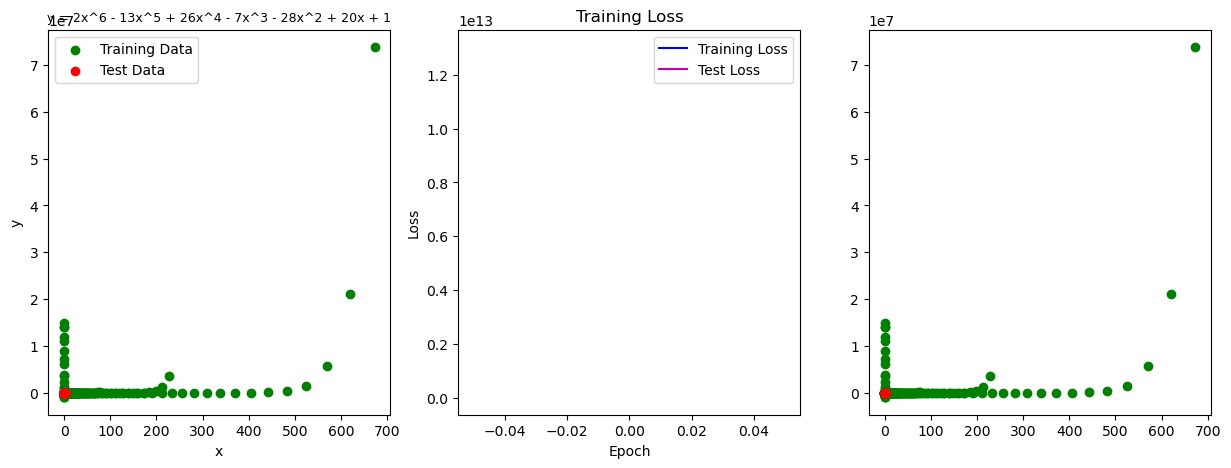

In [58]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plot the ground truth
ax1.scatter(X_train, y_train, c='g', label='Training Data')
ax1.scatter(X_test, y_test, c='r', label='Test Data')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('y = 2x^6 - 13x^5 + 26x^4 - 7x^3 - 28x^2 + 20x + 1')
ax1.title.set_fontsize(9)
ax1.legend(loc='upper left')

# Plot the training loss
ax2.plot(epoch_num, train_losses, c='b', label='Training Loss')
ax2.plot(epoch_num, test_losses, c='m', label='Test Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_title('Training Loss')
ax2.legend(loc='upper right')

# plot the final predictions
ax3.scatter(X_train, y_train, c='g', label='Training Data')
ax3.scatter(X_test, y_test, c='r', label='Test Data')
ax3.scatter(X_train, model(X_train).detach().numpy(), c='b', label='Training Predictions')
ax3.scatter(X_test, model(X_test).detach().numpy(), c='m', label='Test Predictions')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_title('Final Predictions')
ax3.legend(loc='upper left')

In [ ]:
for w in model.state_dict().values():
    print(w)
    

tensor([0.2564])
tensor([-0.9989])
tensor([1.2272])
tensor([-0.3575])
tensor([-3.8901])
tensor([8.1839])
tensor([-2.2589])
